# Partie B: Regression
### Dataset: California housing


#### Installation lib

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP-ML-M2-dataset/housing.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df["housing_median_age"].dtype

dtype('float64')

In [ ]:
df_transformed = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int, drop_first=True)

In [ ]:
df_transformed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [ ]:
cleaned_df = df_transformed.dropna()

In [ ]:
cleaned_df["housing_median_age"] = cleaned_df["housing_median_age"].astype(int)
cleaned_df["total_rooms"] = cleaned_df["total_rooms"].astype("int64")
cleaned_df["total_bedrooms"] = cleaned_df["total_bedrooms"].astype("int64")
cleaned_df["households"] = cleaned_df["households"].astype("int64")
cleaned_df["population"] = cleaned_df["population"].astype("int64")

/tmp/ipython-input-76-3020101555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["housing_median_age"] = cleaned_df["housing_median_age"].astype(int)
/tmp/ipython-input-76-3020101555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["total_rooms"] = cleaned_df["total_rooms"].astype("int64")
/tmp/ipython-input-76-3020101555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
cleaned_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700.0,1,0,0,0


## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# statistiques descriptives
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histogramme

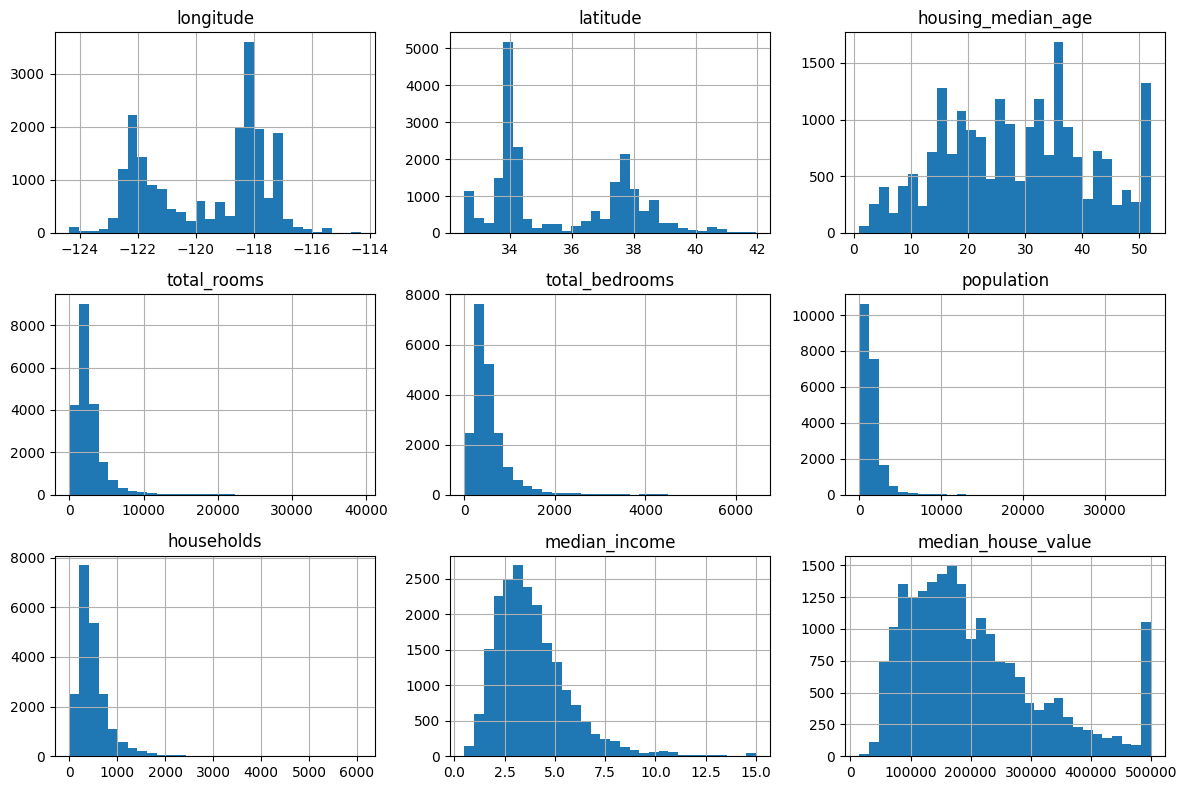

In [ ]:
df.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

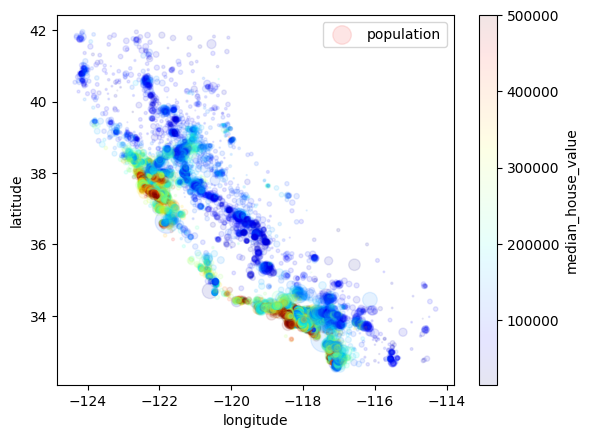

In [104]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
        s=df["population"]/100, label="population",
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
        )
plt.show()

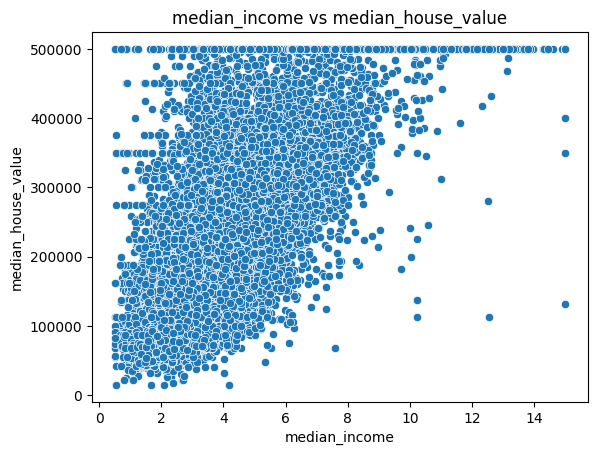

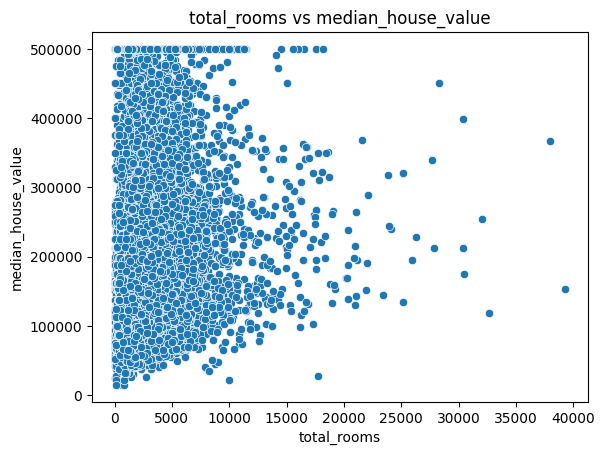

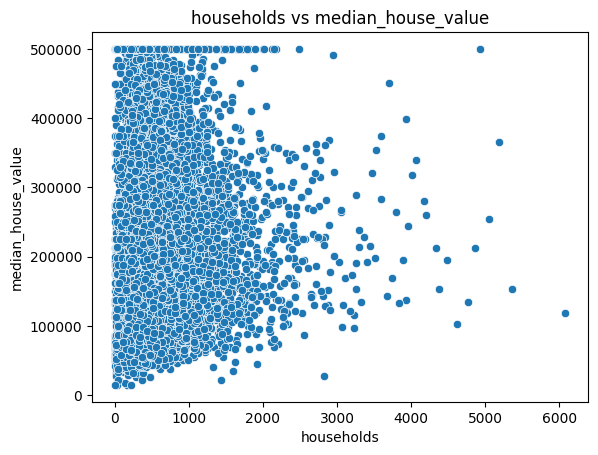

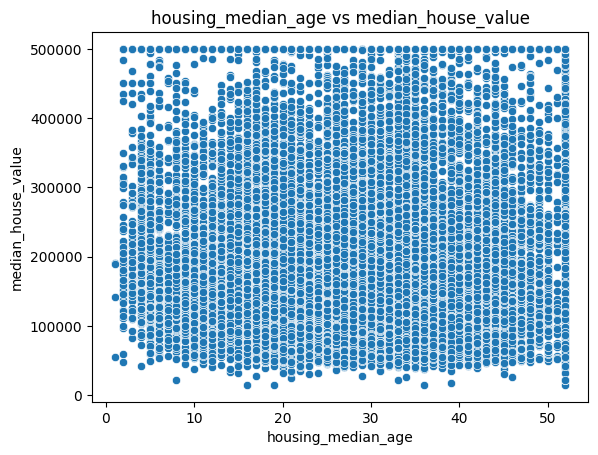

In [ ]:
# Scatterplots (prix vs features clés)
features = ['median_income', 'total_rooms', 'households', 'housing_median_age']

for feature in features:
    sns.scatterplot(data=df, x=feature, y='median_house_value')
    plt.title(f'{feature} vs median_house_value')
    plt.xlabel(feature)
    plt.ylabel("median_house_value")
    plt.show()

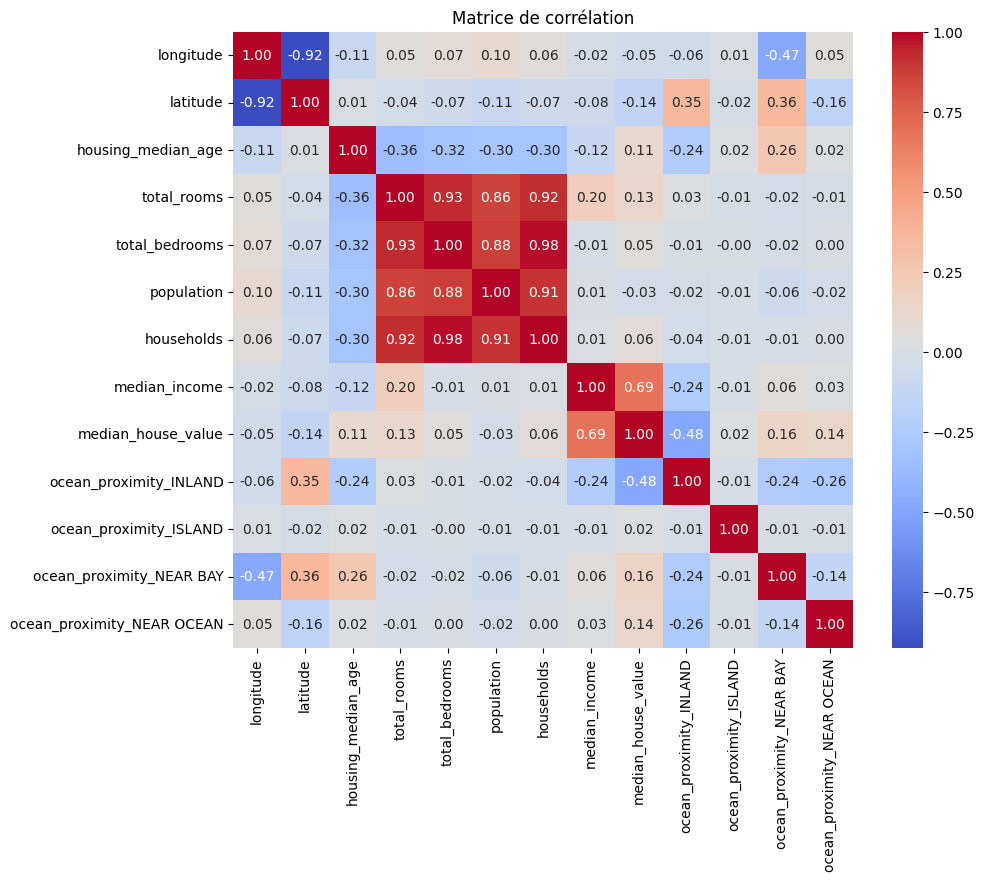

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Split des données

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_set, other_set = train_test_split(cleaned_df, test_size=0.4, random_state=42)
val_set, train_set = train_test_split(other_set, test_size=0.5, random_state=42)

X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"]

X_val = val_set.drop("median_house_value", axis=1)
y_val = val_set["median_house_value"]

X_test = other_set.drop("median_house_value", axis=1)
y_test = other_set["median_house_value"]

In [ ]:
# 4. Appliquer StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit sur train uniquement
X_val_scaled = scaler.transform(X_val)           # transform seulement
X_test_scaled = scaler.transform(X_test)

# Créaction des modèles

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_val_pred = lr.predict(X_val_scaled)

# Évaluation
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Régression Linéaire (Validation) :\nMSE = {mse:.3f}, MAE = {mae:.3f}, R² = {r2:.6f}")


Régression Linéaire (Validation) :
MSE = 4507570774.784, MAE = 48960.136, R² = 0.658372


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_val_ridge = ridge.predict(X_val_scaled)

print("Ridge:")
print(f"MSE: {mean_squared_error(y_val, y_val_ridge):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_ridge):.3f}")
print(f"R² : {r2_score(y_val, y_val_ridge):.6f}")

Ridge:
MSE: 4507582931.774
MAE: 48959.892
R² : 0.658371


In [ ]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_val_lasso = lasso.predict(X_val_scaled)

print("\nLasso:")
print(f"MSE: {mean_squared_error(y_val, y_val_lasso):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_lasso):.3f}")
print(f"R² : {r2_score(y_val, y_val_lasso):.6f}")


Lasso:
MSE: 4507570002.585
MAE: 48960.117
R² : 0.658372


In [ ]:
# Supposons que Ridge donne les meilleurs résultats
best_model = ridge
y_test_pred = best_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"\nÉvaluation Finale (Test set):")
print(f"MSE: {mse_test:.3f}, MAE: {mae_test:.3f}, R²: {r2_test:.3f}")

import numpy as np
from scipy import stats

# Résidus
residuals = y_test - y_test_pred
n = len(y_test)

# Intervalle de confiance à 95%
ci = stats.t.interval(0.95, df=n-1, loc=residuals.mean(), scale=stats.sem(residuals))
print(f"Intervalle de confiance des résidus : {ci}")


Évaluation Finale (Test set):
MSE: 4521793129.449, MAE: 49156.744, R²: 0.656
Intervalle de confiance des résidus : (np.float64(-1530.3680662766574), np.float64(1385.7610664005706))


### Interprétation :

- La variable `median_income` (revenu médian) a la plus forte corrélation avec `median_house_value`, ce qui est logique.
- Les modèles régularisés (Ridge, Lasso) améliorent légèrement les scores par rapport à la régression linéaire simple.
- Le modèle Ridge semble offrir un bon compromis entre biais et variance.

### Pistes d’amélioration :
- Utiliser des modèles non-linéaires comme RandomForestRegressor, GradientBoosting, ou XGBoost.
- Tester une réduction de dimension (PCA).
